Използват се библиотеките pandas, numpy, matplotlib и seaborn за обработка, визуализация и анализ на данни. Кода чете данни от CSV файл и извлича подмножество от характеристики. Използва се методът на k-средни за кластеризация на данните и визуализацията на резултатите. Също така се използва стандартизация на данните и методът на анализ на главни компоненти (PCA) за намаляване на размерността. Резултатите от PCA и обяснената дисперсия се визуализират и анализират.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hd = pd.read_csv('sample_data/Heart_disease_details.csv')

In [ ]:
X = hd.iloc[:,2:6]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
predicted_y = kmeans.fit_predict(X)
predicted_y 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 5, 5, 0, 0, 5, 2, 0, 5, 2, 2, 5, 0, 2, 0, 6, 3, 1, 0, 0, 5,
       5, 1, 5, 5, 6, 0, 5, 5, 2, 2, 2, 5, 2, 2, 5, 5, 2, 2, 5, 2, 2, 2,
       5, 0, 5, 5, 2, 5, 5, 0, 0, 1, 2, 0, 1, 6, 6, 2, 2, 1, 1, 1, 1, 3,
       1, 6, 1, 6, 2, 3, 1, 3, 6, 5, 6, 1, 0, 3, 2, 3, 0, 1, 3, 6, 5, 6,
       1, 0, 2, 3, 0, 1, 3, 1, 3, 6, 3, 1, 2, 1, 1, 3, 0, 5, 6, 0, 3, 3,
       5, 2, 0, 6, 0, 5, 2, 2, 6, 5, 2, 5, 0, 2, 5, 0, 2, 2, 2, 5, 5, 0,
       0, 5, 5, 2, 4, 4, 4, 2, 2, 4, 1, 5, 2, 0, 5, 2, 5, 0, 5, 2, 5, 3,
       6, 6, 1, 3, 6, 0, 5, 5, 0, 6, 6, 0, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 6, 1, 3, 6, 3, 1,
       1, 3, 3, 1, 1, 1, 6, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 6, 3,
       3, 3, 3, 3, 1, 6, 1, 1, 6, 6, 1, 0, 3, 5, 3, 3, 6, 3, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 6, 6, 6, 1, 0, 3, 5, 6, 0, 6, 5, 6, 0, 0, 1, 1, 1,
       3, 6, 1, 6, 1, 6, 3, 3, 3, 6, 1, 1, 3, 0, 5, 6, 6, 0, 1, 1, 6, 6,
       3, 1, 1, 0, 3, 1, 0, 5, 6, 0, 5, 0, 5, 6, 1,

In [ ]:
hd.Diagnosis.astype('category').cat.codes

0      8
1      8
2      8
3      8
4      8
      ..
329    7
330    7
331    7
332    7
333    7
Length: 334, dtype: int8

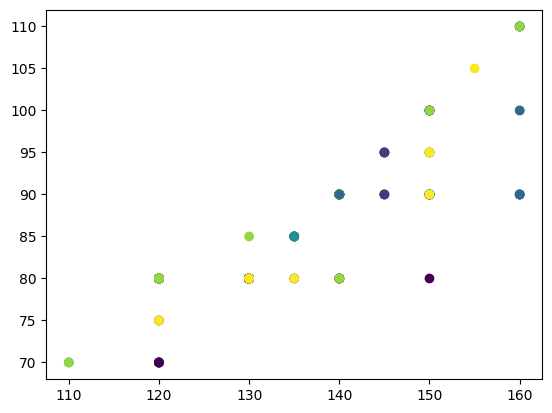

In [ ]:
plt.scatter(hd.Systolic, hd.Diastolic, c=predicted_y)

In [ ]:
kmeans.inertia_

2308.9032535848255

In [ ]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[76540.50598802391,
 21619.825324675337,
 11801.164748508098,
 6347.02979783463,
 4368.751175830839,
 3059.430161853107,
 2226.7720138337195,
 1659.7997190752506,
 1278.947315346153,
 1088.6733057368485]

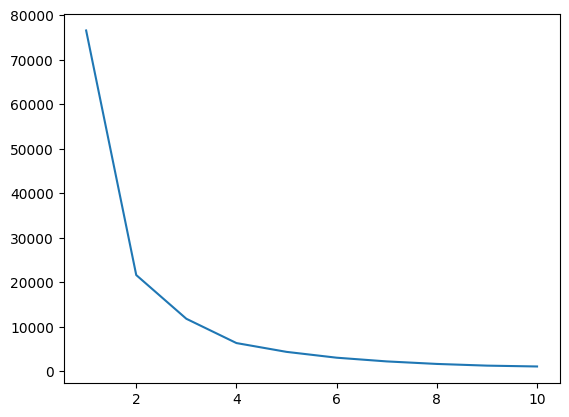

In [ ]:
plt.plot(list(range(1,11)), wcss)

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Systolic', 'Diastolic', 'Heart rate (bpm)', ]
x = hd.loc[:, features].values
x = StandardScaler().fit_transform(x)
x

array([[ 0.32059118,  0.68839332,  0.97975065, -0.09894386],
       [ 0.45278557,  1.68589167, -0.46182079,  0.75942621],
       [ 0.65107715, -0.30910503,  0.25896493, -0.52812889],
       ...,
       [ 0.98156313,  0.68839332,  0.97975065,  0.75942621],
       [ 1.17985471,  0.68839332,  0.97975065,  0.75942621],
       [-0.34038076, -0.30910503, -0.46182079,  1.61779628]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
hd_pca = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
hd_pca.head()

,pc1,pc2
0,1.195287,-0.076437
1,0.985261,-0.561973
2,0.268855,0.700242
3,1.725621,0.056195
4,0.061952,-0.000576


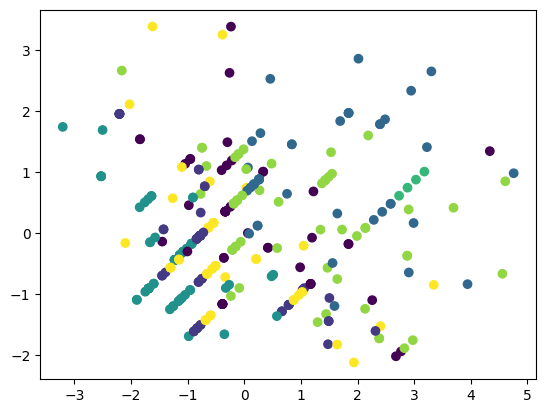

In [ ]:
plt.scatter(hd_pca.pc1, hd_pca.pc2, c=predicted_y)

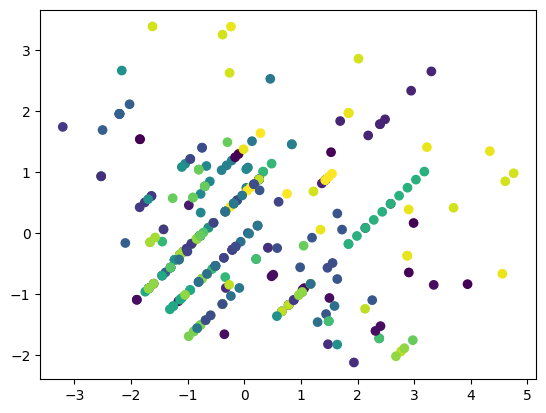

In [ ]:
plt.scatter(hd_pca.pc1, hd_pca.pc2, c=hd.Diagnosis.astype('category').cat.codes)

In [ ]:
pca.explained_variance_ratio_

array([0.53561553, 0.27658327])

In [ ]:
pca2 = PCA(n_components=4)
principalComponents = pca2.fit_transform(x)
hd_pca2 = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
hd_pca2.head()

,pc1,pc2,pc3,pc4
0,1.195287,-0.076437,0.267461,-0.200689
1,0.985261,-0.561973,-0.521944,1.509395
2,0.268855,0.700242,-0.243016,-0.493712
3,1.725621,0.056195,0.004878,0.107577
4,0.061952,-0.000576,-0.681838,0.398498


In [ ]:
pca2.explained_variance_ratio_

array([0.53561553, 0.27658327, 0.15515104, 0.03265016])